# Convolution and Pooling

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
training_images = training_images / 255
test_images = test_images / 255

In [7]:
model = tf.keras.models.Sequential([
    
    # Add convolution and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print()
print('Model training:')
model.fit(
    training_images,
    training_labels,
    epochs=5
)
print()

print('Model evaluation:')
test_loss = model.evaluate(test_images, test_labels)
print()

print('Output of evaluate')
print(test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Visualize Convolution and Pooling

layer_outputs
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 32), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 32), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 800), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_2/Relu:0', description="created by layer 'dense_2'")
KerasTensor(type_spec=TensorS

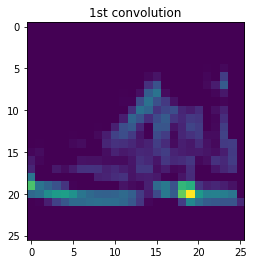

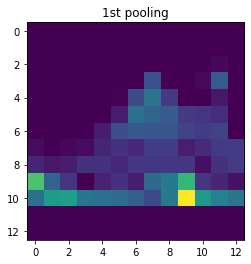

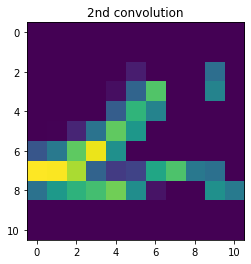

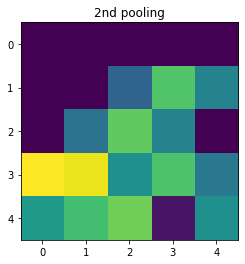

In [23]:
idx = 0
convolution_number = 0

# layer_outputs is a list of layer objects
layer_outputs = [layer.output for layer in model.layers]

print('layer_outputs')
for layer in layer_outputs:
    print(layer)

# This model can output a list of each layer output
activation_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=layer_outputs
)

# Get output of each layer
test_image = test_images[idx]
test_image = test_image.reshape(1, 28, 28, 1)
pred = activation_model.predict(test_image)

print()
print(f'type(pred): {type(pred)}')
print(f'type(pred[0]): {type(pred[0])}')
print()

# The first 4 layers are convolution and pooling
titles = [
    '1st convolution',
    '1st pooling',
    '2nd convolution',
    '2nd pooling'
]
for i in range(4):
    output = pred[i]
    plt.imshow(output[0, :, :, convolution_number])
    plt.title(titles[i])
    plt.show()

## Explore Convolution

type(ascent_image): <class 'numpy.ndarray'>
Shape: (512, 512)



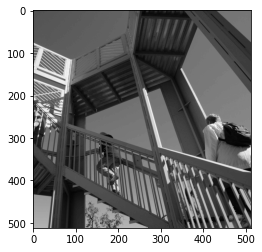

In [6]:
ascent_image = misc.ascent()

print(f'type(ascent_image): {type(ascent_image)}')
print(f'Shape: {ascent_image.shape}')
print()

plt.gray()
plt.imshow(ascent_image)
plt.show()

## Manually Apply Convolution

- Iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter
- For example, the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)
- Multiply the result by the weight, and then ensure the result is in the range 0-255

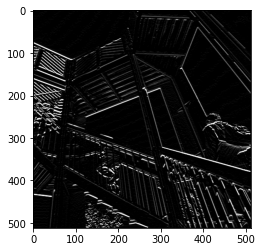

In [15]:
# Experiment with different values and see the effect
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

size_x, size_y = ascent_image.shape
image_transformed = np.zeros((size_x, size_y))

# Iterate over the image
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
        convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
        convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
        convolution = convolution + (ascent_image[x, y] * filter[1][1])    
        convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
        convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
        convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
        convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
        # ?
        # Multiply by weight
        convolution = convolution * weight   
      
        # Check the boundaries of the pixel values
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255

        # Load into the transformed image
        image_transformed[x, y] = convolution


plt.gray()
plt.imshow(image_transformed)
plt.show()

## Manually Apply Max Pooling

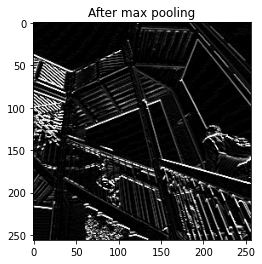

Shape: (256, 256)



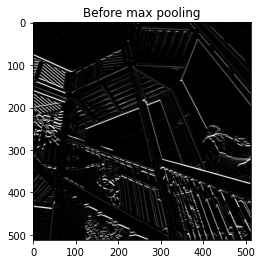

Shape: (512, 512)


In [17]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))

# Steo is 2 because every 2 by 2 we apply max pooling
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        # Pooling
        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Max
        # Get only the largest value and assign to the reduced image
        newImage[int(x / 2),int(y / 2)] = max(pixels)


# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.title('After max pooling')
plt.imshow(newImage)
plt.show()
print(f'Shape: {newImage.shape}')
print()
plt.gray()
plt.title('Before max pooling')
plt.imshow(image_transformed)
plt.show()
print(f'Shape: {image_transformed.shape}')

## Reference

- [Ungraded Lab: Improving Computer Vision Accuracy using Convolutions](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb)
- [Ungraded Lab: Exploring Convolutions](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb)